In [8]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


In [9]:
df=pd.read_csv("/content/MNIST_train.csv")


In [10]:
df=df.drop("even",axis=1, errors='ignore')
X=df.drop("label", axis=1)
y=df["label"]

In [11]:
X=X/255

In [12]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W = None    #weights is a 2D vector
        self.b = None    # bias is also a 2D vector

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _one_hot(self, y, num_classes):
        return np.eye(num_classes)[y]

    def _cross_entropy_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = np.max(y) + 1  # assuming labels are 0-indexed

        # Initialize weights and bias
        self.W = np.random.randn(num_features, num_classes) * 0.01
        self.b = np.zeros((1, num_classes))
        #print ('shape of weights is', np.shape(self.W))
        #print ('shape of bias is', np.shape(self.b))

        # One-hot encode labels
        Y_onehot = self._one_hot(y, num_classes)
        #print ('shape of label vector is', np.shape(Y_onehot))

        for epoch in range(self.epochs):
            # Forward pass
            logits = np.dot(X, self.W) + self.b
            probs = self._softmax(logits)
            #print ('shape of logits is', np.shape(logits))
            #print ('shape of probs is', np.shape(probs))

            # Loss (for monitoring)
            loss = self._cross_entropy_loss(Y_onehot, probs)
            #print ('shape of loss vector is', np.shape(loss))

            # Backward pass
            grad_logits = (1./ num_samples) * (Y_onehot - probs)
            grad_W = -np.dot(X.T, grad_logits)
            grad_b = -np.sum(grad_logits, axis=0, keepdims=True)

            # Update weights
            self.W -= self.learning_rate * grad_W
            self.b -= self.learning_rate * grad_b

            if epoch % 100 == 0 or epoch == self.epochs - 1:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict_proba(self, X):
        logits = np.dot(X, self.W) + self.b
        return self._softmax(logits)

    def predict(self, X):
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)


In [15]:
df_val=pd.read_csv('/content/MNIST_validation.csv')

In [16]:
df_val=df_val.drop("even",axis=1, errors='ignore')
X_val=df_val.drop("label",axis=1)
y_val=df_val["label"]

In [17]:
X_val=X_val/255

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import f1_score, confusion_matrix

In [34]:
import time
start=time.time()
model=SoftmaxRegression()
model.fit(X, y)
ypred_train=model.predict(X.values)
ypred=model.predict(X_val.values)
log_acc=accuracy_score(y_val, ypred)
log_acc_train=accuracy_score(y, ypred_train)
weighted_f1 = f1_score(y_val, ypred, average='weighted')
weighted_f1_train=f1_score(y, ypred_train, average='weighted')
print("--- %s seconds ---" % (time.time() - start))
print(f"Logistic Regression  Accuracy: {log_acc:.4f}")
print("Weighted F1 score:", weighted_f1)
print(f"Logistic Regression  Accuracy train: {log_acc_train:.4f}")
print("Weighted F1 score:-train", weighted_f1_train)

Epoch 0: Loss = 2.3124
Epoch 100: Loss = 0.6149
Epoch 200: Loss = 0.4927
Epoch 300: Loss = 0.4412
Epoch 400: Loss = 0.4109
Epoch 500: Loss = 0.3902
Epoch 600: Loss = 0.3747
Epoch 700: Loss = 0.3626
Epoch 800: Loss = 0.3526
Epoch 900: Loss = 0.3442
Epoch 999: Loss = 0.3370
--- 58.334142446517944 seconds ---
Logistic Regression  Accuracy: 0.9000
Weighted F1 score: 0.8995851664857049
Logistic Regression  Accuracy train: 0.9077
Weighted F1 score: 0.9074281773823547


In [21]:
print(ypred)

[4 6 7 ... 9 1 0]


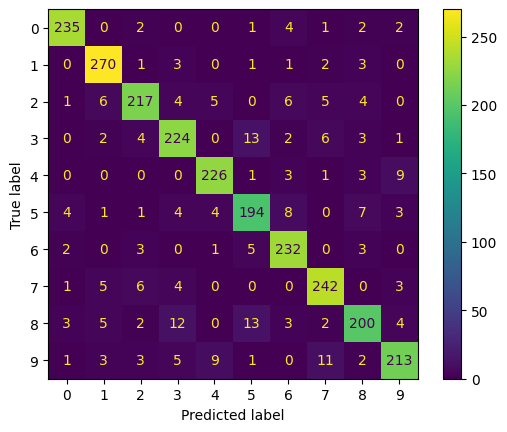

In [23]:
ConfusionMatrixDisplay(confusion_matrix(y_val, ypred)).plot()

Hyperparamter Tuning

In [36]:
epochs=[100,200,500,1000,2000]
for e in epochs:
  start_e=time.time()
  model_e=SoftmaxRegression(epochs=e)
  model_e.fit(X, y)
  ypred_train_e=model_e.predict(X.values)
  ypred_e=model_e.predict(X_val.values)
  log_acc_train_e=accuracy_score(y, ypred_train_e)
  log_acc_e=accuracy_score(y_val, ypred_e)
  weighted_f1_train_e = f1_score(y, ypred_train_e, average='weighted')
  weighted_f1_e = f1_score(y_val, ypred_e, average='weighted')
  print(f"--- (epoch-{e}) {time.time() - start_e:.2f} seconds ---")
  print(f"Logistic Regression  Accuracy train-{e}: {log_acc_train_e:.4f}")
  print(f"Logistic Regression  Accuracy-{e}: {log_acc_e:.4f}")
  print(f"Weighted F1 score-{e}: {weighted_f1_e}")
  print(f"Weighted F1 score train-{e}: {weighted_f1_train_e}")
  print('-' * 50)

Epoch 0: Loss = 2.2995
Epoch 99: Loss = 0.6164
--- (epoch-100) 5.76 seconds ---
Logistic Regression  Accuracy train-100: 0.8562
Logistic Regression  Accuracy-100: 0.8595
Weighted F1 score-100: 0.8583678762388459
Weighted F1 score train-100: 0.8552799694353962
--------------------------------------------------
Epoch 0: Loss = 2.2977
Epoch 100: Loss = 0.6145
Epoch 199: Loss = 0.4933
--- (epoch-200) 16.91 seconds ---
Logistic Regression  Accuracy train-200: 0.8746
Logistic Regression  Accuracy-200: 0.8752
Weighted F1 score-200: 0.874418438480044
Weighted F1 score train-200: 0.8740137687555869
--------------------------------------------------
Epoch 0: Loss = 2.3047
Epoch 100: Loss = 0.6147
Epoch 200: Loss = 0.4927
Epoch 300: Loss = 0.4413
Epoch 400: Loss = 0.4111
Epoch 499: Loss = 0.3905
--- (epoch-500) 34.13 seconds ---
Logistic Regression  Accuracy train-500: 0.8940
Logistic Regression  Accuracy-500: 0.8892
Weighted F1 score-500: 0.8886084547877485
Weighted F1 score train-500: 0.8936138

In [37]:
lr=[0.01,0.02,0.1,0.2]
for l in lr:
  start_l=time.time()
  model_l=SoftmaxRegression(learning_rate=l)
  model_l.fit(X, y)
  ypred_train_l=model_l.predict(X.values)
  ypred_l=model_l.predict(X_val.values)
  log_acc_train_l=accuracy_score(y, ypred_train_l)
  log_acc_l=accuracy_score(y_val, ypred_l)
  weighted_f1_train_l = f1_score(y, ypred_train_l, average='weighted')
  weighted_f1_l = f1_score(y_val, ypred_l, average='weighted')
  print(f"--- (Learning rate-{l}) {time.time() - start_l:.2f} seconds ---")
  print(f"Logistic Regression  Accuracy train-{l}: {log_acc_train_l:.4f}")
  print(f"Logistic Regression  Accuracy-{l}: {log_acc_l:.4f}")
  print(f"Weighted F1 score train-{l}: {weighted_f1_train_l}")
  print(f"Weighted F1 score-{l}: {weighted_f1_l}")
  print('-' * 50)

Epoch 0: Loss = 2.3243
Epoch 100: Loss = 1.5671
Epoch 200: Loss = 1.2027
Epoch 300: Loss = 1.0068
Epoch 400: Loss = 0.8869
Epoch 500: Loss = 0.8061
Epoch 600: Loss = 0.7477
Epoch 700: Loss = 0.7032
Epoch 800: Loss = 0.6680
Epoch 900: Loss = 0.6394
Epoch 999: Loss = 0.6158
--- (Learning rate-0.01) 60.42 seconds ---
Logistic Regression  Accuracy train-0.01: 0.8574
Logistic Regression  Accuracy-0.01: 0.8619
Weighted F1 score train-0.01: 0.8564775369585841
Weighted F1 score-0.01: 0.8608117793027275
--------------------------------------------------
Epoch 0: Loss = 2.3011
Epoch 100: Loss = 1.1973
Epoch 200: Loss = 0.8852
Epoch 300: Loss = 0.7469
Epoch 400: Loss = 0.6677
Epoch 500: Loss = 0.6155
Epoch 600: Loss = 0.5780
Epoch 700: Loss = 0.5495
Epoch 800: Loss = 0.5269
Epoch 900: Loss = 0.5084
Epoch 999: Loss = 0.4931
--- (Learning rate-0.02) 58.21 seconds ---
Logistic Regression  Accuracy train-0.02: 0.8746
Logistic Regression  Accuracy-0.02: 0.8739
Weighted F1 score train-0.02: 0.874020148

In [35]:
import time
start_best=time.time()
model_best=SoftmaxRegression(learning_rate=0.2,epochs=2000)
model_best.fit(X, y)
ypred_train=model_best.predict(X.values)
ypred_best=model_best.predict(X_val.values)
log_acc_train_best=accuracy_score(y, ypred_train)
log_acc_best=accuracy_score(y_val, ypred_best)
weighted_f1_train_best=f1_score(y, ypred_train, average='weighted')
weighted_f1_best = f1_score(y_val, ypred_best, average='weighted')
print("--- %s seconds ---" % (time.time() - start_best))
print(f"Logistic Regression  Accuracy best: {log_acc_best:.4f}")
print("Weighted F1 score:(best)", weighted_f1_best)
print(f"Logistic Regression  Accuracy train: {log_acc_train_best:.4f}")
print("Weighted F1 score:(train)", weighted_f1_train_best)


Epoch 0: Loss = 2.3184
Epoch 100: Loss = 0.4921
Epoch 200: Loss = 0.4108
Epoch 300: Loss = 0.3748
Epoch 400: Loss = 0.3526
Epoch 500: Loss = 0.3370
Epoch 600: Loss = 0.3251
Epoch 700: Loss = 0.3155
Epoch 800: Loss = 0.3076
Epoch 900: Loss = 0.3008
Epoch 1000: Loss = 0.2949
Epoch 1100: Loss = 0.2897
Epoch 1200: Loss = 0.2851
Epoch 1300: Loss = 0.2809
Epoch 1400: Loss = 0.2771
Epoch 1500: Loss = 0.2736
Epoch 1600: Loss = 0.2704
Epoch 1700: Loss = 0.2674
Epoch 1800: Loss = 0.2646
Epoch 1900: Loss = 0.2619
Epoch 1999: Loss = 0.2595
--- 123.7355408668518 seconds ---
Logistic Regression  Accuracy best: 0.9116
Weighted F1 score:(best) 0.9112644696445705
Logistic Regression  Accuracy train: 0.9290
Weighted F1 score:(train) 0.9288255972833698
